# Analyse d'un signal audio avec un message caché 

---

Le [fichier](https://drive.google.com/file/d/1lRmLewUa36uWEqYwKfPhDwTQH_VSKlQ8/view?usp=share_link) contient un message caché. Trouvez-le !

---

On possede un fichier audio qui contient un message caché. Ce message peut être caché sous forme ***audio***, ***texte*** ou ***image***. On va tenter de le chercher pour chaque forme.

## Plan d'analyse :
1. Transformation du signal audio en texte
2. Transformation du signal audio en image  
3. Filtrage du signal audio avec les filtres high-pass, low-pass et band-pass


Spoiler : Le message caché est "2586".

---
### Importation des librairies

In [13]:
import math

from glob import glob
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, sosfiltfilt, spectrogram
import sys

%reload_ext autoreload
%autoreload 2

---

### Lecture de l'audio

In [14]:
# Lancer l'audio original
audio_file = glob("data/IN.wav")
ipd.Audio(audio_file[0])

In [15]:
# Lire le fichier audio
samplerate, data = wavfile.read('IN.wav')

# Créer un vecteur temps
t = np.arange(len(data)) / samplerate

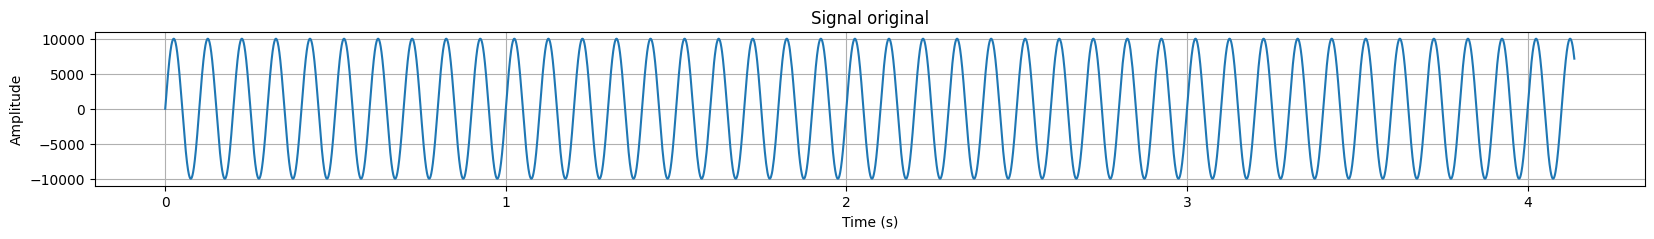

In [16]:
# Plotter le signal original
plt.figure(figsize=(20, 2))

plt.plot(t, data)
plt.title('Signal original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.show()


---
### Transformation du signal audio en texte

In [17]:
# Assurer que le signal est en bon format
data_int = np.array(data, dtype=np.int16)

# Extraire les bits de poids faible
extracted_LSB = ''.join(format(byte, '016b')[-1] for byte in data_int.flatten())

# Diviser les bits en blocs de 8
string_blocks = (extracted_LSB[i:i+8] for i in range(0, len(extracted_LSB), 8))

# Convertir les blocs de bits en caractères
decoded = ''.join(chr(int(char, 2)) for char in string_blocks)

# Imprimer le message en maniere lisible
for i in range(0, len(decoded[:700]), 140):
    print(decoded[:700][i:i+140])


UZ«UZªURªªªª­UR«T©ZÖ¶I$Ù³339qÃÁøÿÿþø<8ãÌÙ²KKZ¥UUªRÒI³3ááü  ÇÍm­jªªVÙ³áàÿà|q%¥JªT´3ðÿ fdµUT¥¶fcà Í¶ÖªªÖfc ÃÍ
¶ji$ÌãÿÿàãKT«T¶Éáà  øã3$µªªµ¶Épø ðã36ÒUV´38àÿ fl*©RÒLÜÇÿÿÃæÍ´µ*ª«ZÛlÙÌqàü  ÃÃæfÉ%¥jUZ¥im¶ÌÌcÀÿÿàÁáãÇ8ÎfffÍI$´´µ
­Jj¥URªªªªUVª­U*­UUJ«UJªÕURªªªª©UV«T©ZÖ´¶I$Ù³339qÃÁøÿÿþø<8ãÌÙ²KKZ¥UUªRÒI³3áÁü  ÇÍ-¥jªªVÙ³áàÿà<q%¥JªT´3ðÿ ?fdµUT¥¶fcÀ
 ÇÍÖªªfc ÃÍ¶*µi$Ìãÿ?àãKVªT¶Ùãà  øã3$ªªµ¤Ùpø ðã36ÒUV´38àþ fl*©RÒLÇÿÿÃæÍ´µªª«RÛlÌqàü  ÁÃæfÉ%¥*ÕUR­ii6ÍÌcÀ?
ÿÿàÁðáÇ8ÎfffÍI$¶µ­Jj¥UZªªªªµUTª­Uj­UUJ«UJªURªªªª­UR«T©ZÖI$É³339qÃÃÁøÿÿüø<8ãÌ¶ÛKR­UT«RÒI3áàü  ?Ç9m­JªªVÙ³áàÿà|q%¥JªT´


On observe que le texte n'est pas lisible. On constate donc que le message n'est pas caché sous forme de texte ou alors il faut le decoder dans une autre manière.

---
### Transformation du signal audio en image

Comme certain gens s'amusent à cacher des messages sous la forme d'image dans l'audio comme, par example, dans cet [article](https://www.instructables.com/Secret-Message-in-Audio/) on va tenter de transformer le signal audio en image pour voir si on peut trouver quelque chose. Il s'agit de le spectrogramme du signal audio.

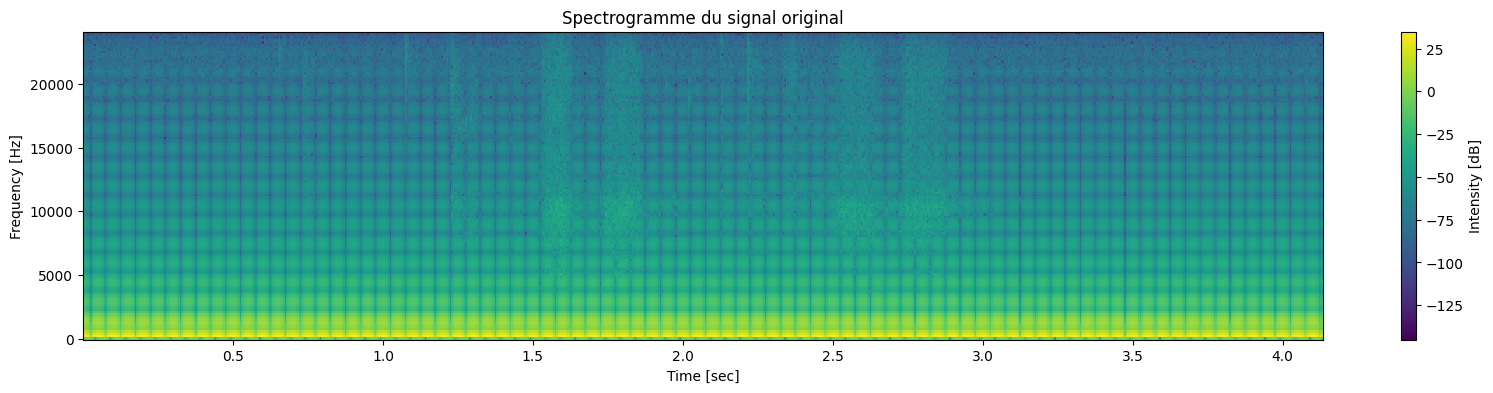

In [18]:
# Calculer le spectrogramme
frequencies, times, spectrogram_data = spectrogram(data, samplerate)

# Plotter le spectrogramme
plt.figure(figsize=(20, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogramme du signal original')
plt.colorbar(label='Intensity [dB]')
plt.show()


Malheureusement, on ne trouve rien dans le spectrogramme. On va donc tenter de filtrer le signal audio pour voir si on peut trouver quelque chose.

---
### Filtrage du signal audio avec les filtres low-pass, high-pass et band-pass

1. **Filtre low-pass** : On va filtrer le signal audio avec un filtre low-pass, c'est-à-dire qu'on va laisser passer que les fréquences inférieures à une certaine fréquence de coupure en supprimant les fréquences plus hautes.

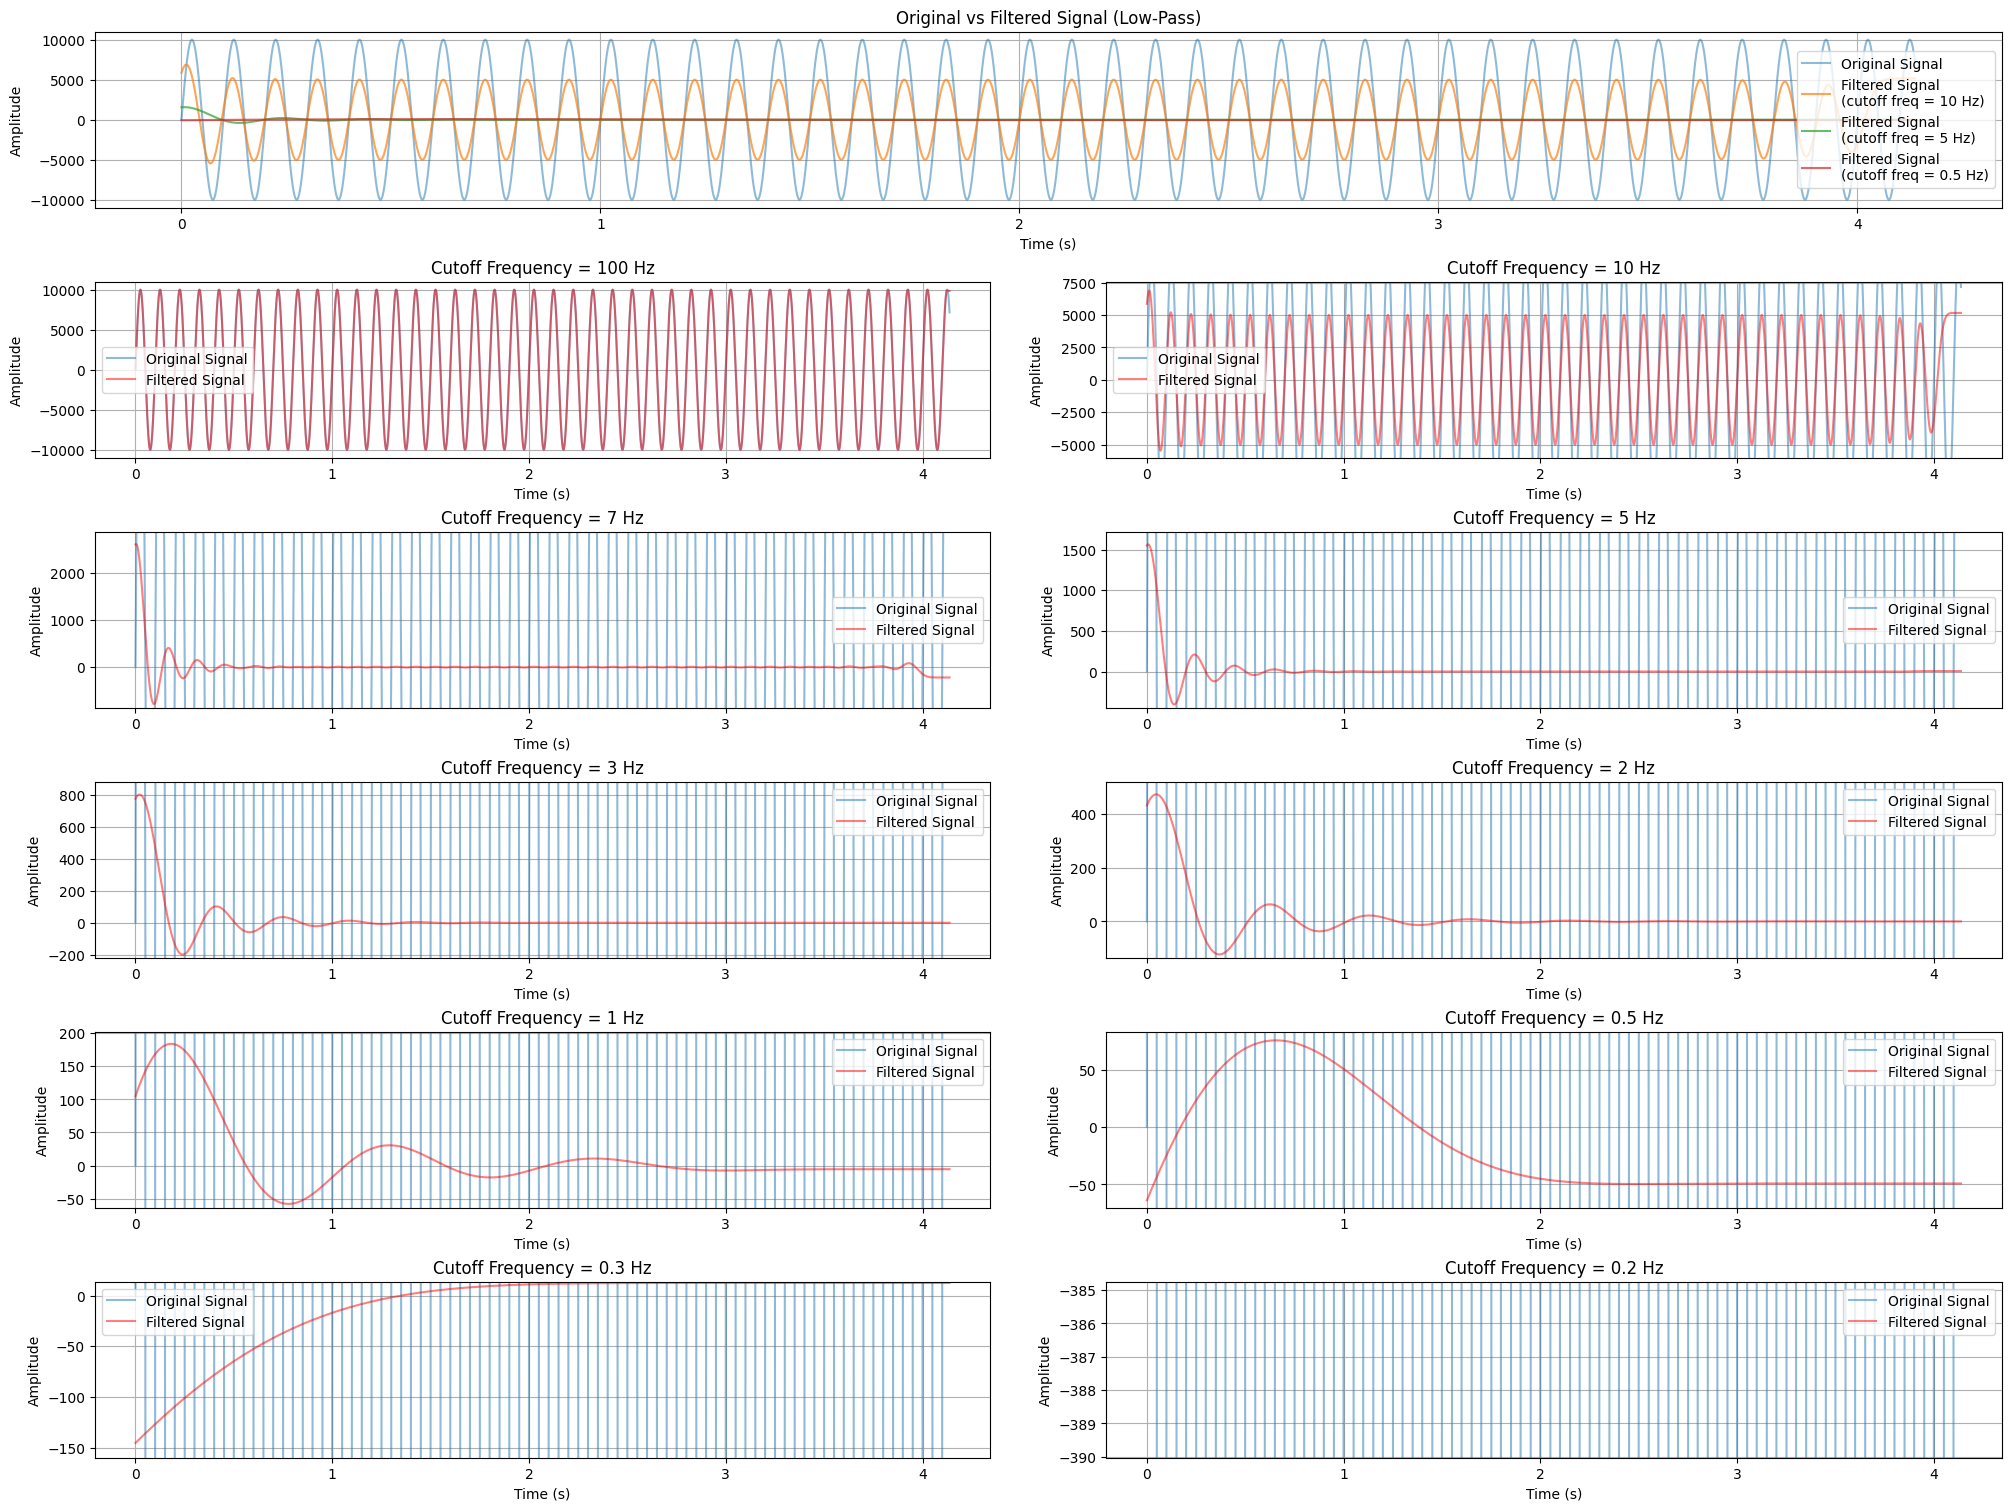

In [19]:
# Définir les fréquences de coupure
f_lows = [100, 10, 7, 5, 3, 2, 1, 0.5, 0.3, 0.2]

fig, ax = plt.subplot_mosaic([[1, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11]], 
                              figsize=(20, 15), constrained_layout=True)

# Plotter le signal original
ax[1].plot(t, data, label='Original Signal', alpha=0.5)

# Itterer sur les fréquences de coupure
for i, f_low in enumerate(f_lows):
    
    # Definir le filtre
    sos = butter(10, f_low, btype='low', fs=samplerate, output='sos')
    
    # Appliquer le filtre
    filtered_signal = sosfiltfilt(sos, data).astype(np.float32)
    
    # Sauvegarder le signal filtré
    output_file = f'audio/IN_low_pass_{f_low}.wav'
    wavfile.write(output_file, samplerate, filtered_signal)
    
    # Plotter le signal filtré et original
    if i in [1, 3, 7]:
        ax[1].plot(t, filtered_signal, alpha=0.7,
                     label=f'Filtered Signal \n(cutoff freq = {f_low} Hz)')
    ax[i+2].plot(t, data, label='Original Signal', alpha=0.5)
    ax[i+2].plot(t, filtered_signal, color='r', alpha=0.5,
                 label=f'Filtered Signal')
    ax[i+2].set_xlabel('Time (s)')
    ax[i+2].set_ylabel('Amplitude')
    if i != 0:
        ax[i+2].set_ylim(min(filtered_signal)*1.1, max(filtered_signal)*1.1)
    ax[i+2].set_title(f'Cutoff Frequency = {f_low} Hz')
    ax[i+2].legend()
    ax[i+2].grid(True)

ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Original vs Filtered Signal (Low-Pass)')
ax[1].legend()
ax[1].grid(True)
plt.show()

In [20]:
# Lancer le meilleur audio filtré
audio_file = glob('audio/IN_low_pass_*.wav')
ipd.Audio(audio_file[2])

On observe donc que le filtraage des fréquences hautes attenue le signal presque complètement. On ne trouve donc plus rien dans le signal filtré.

2. **Filtre high-pass** : On va filtrer le signal audio avec un filtre high-pass, c'est-à-dire qu'on va laisser passer que les fréquences supérieures à une certaine fréquence de coupure en supprimant les fréquences plus basses. 

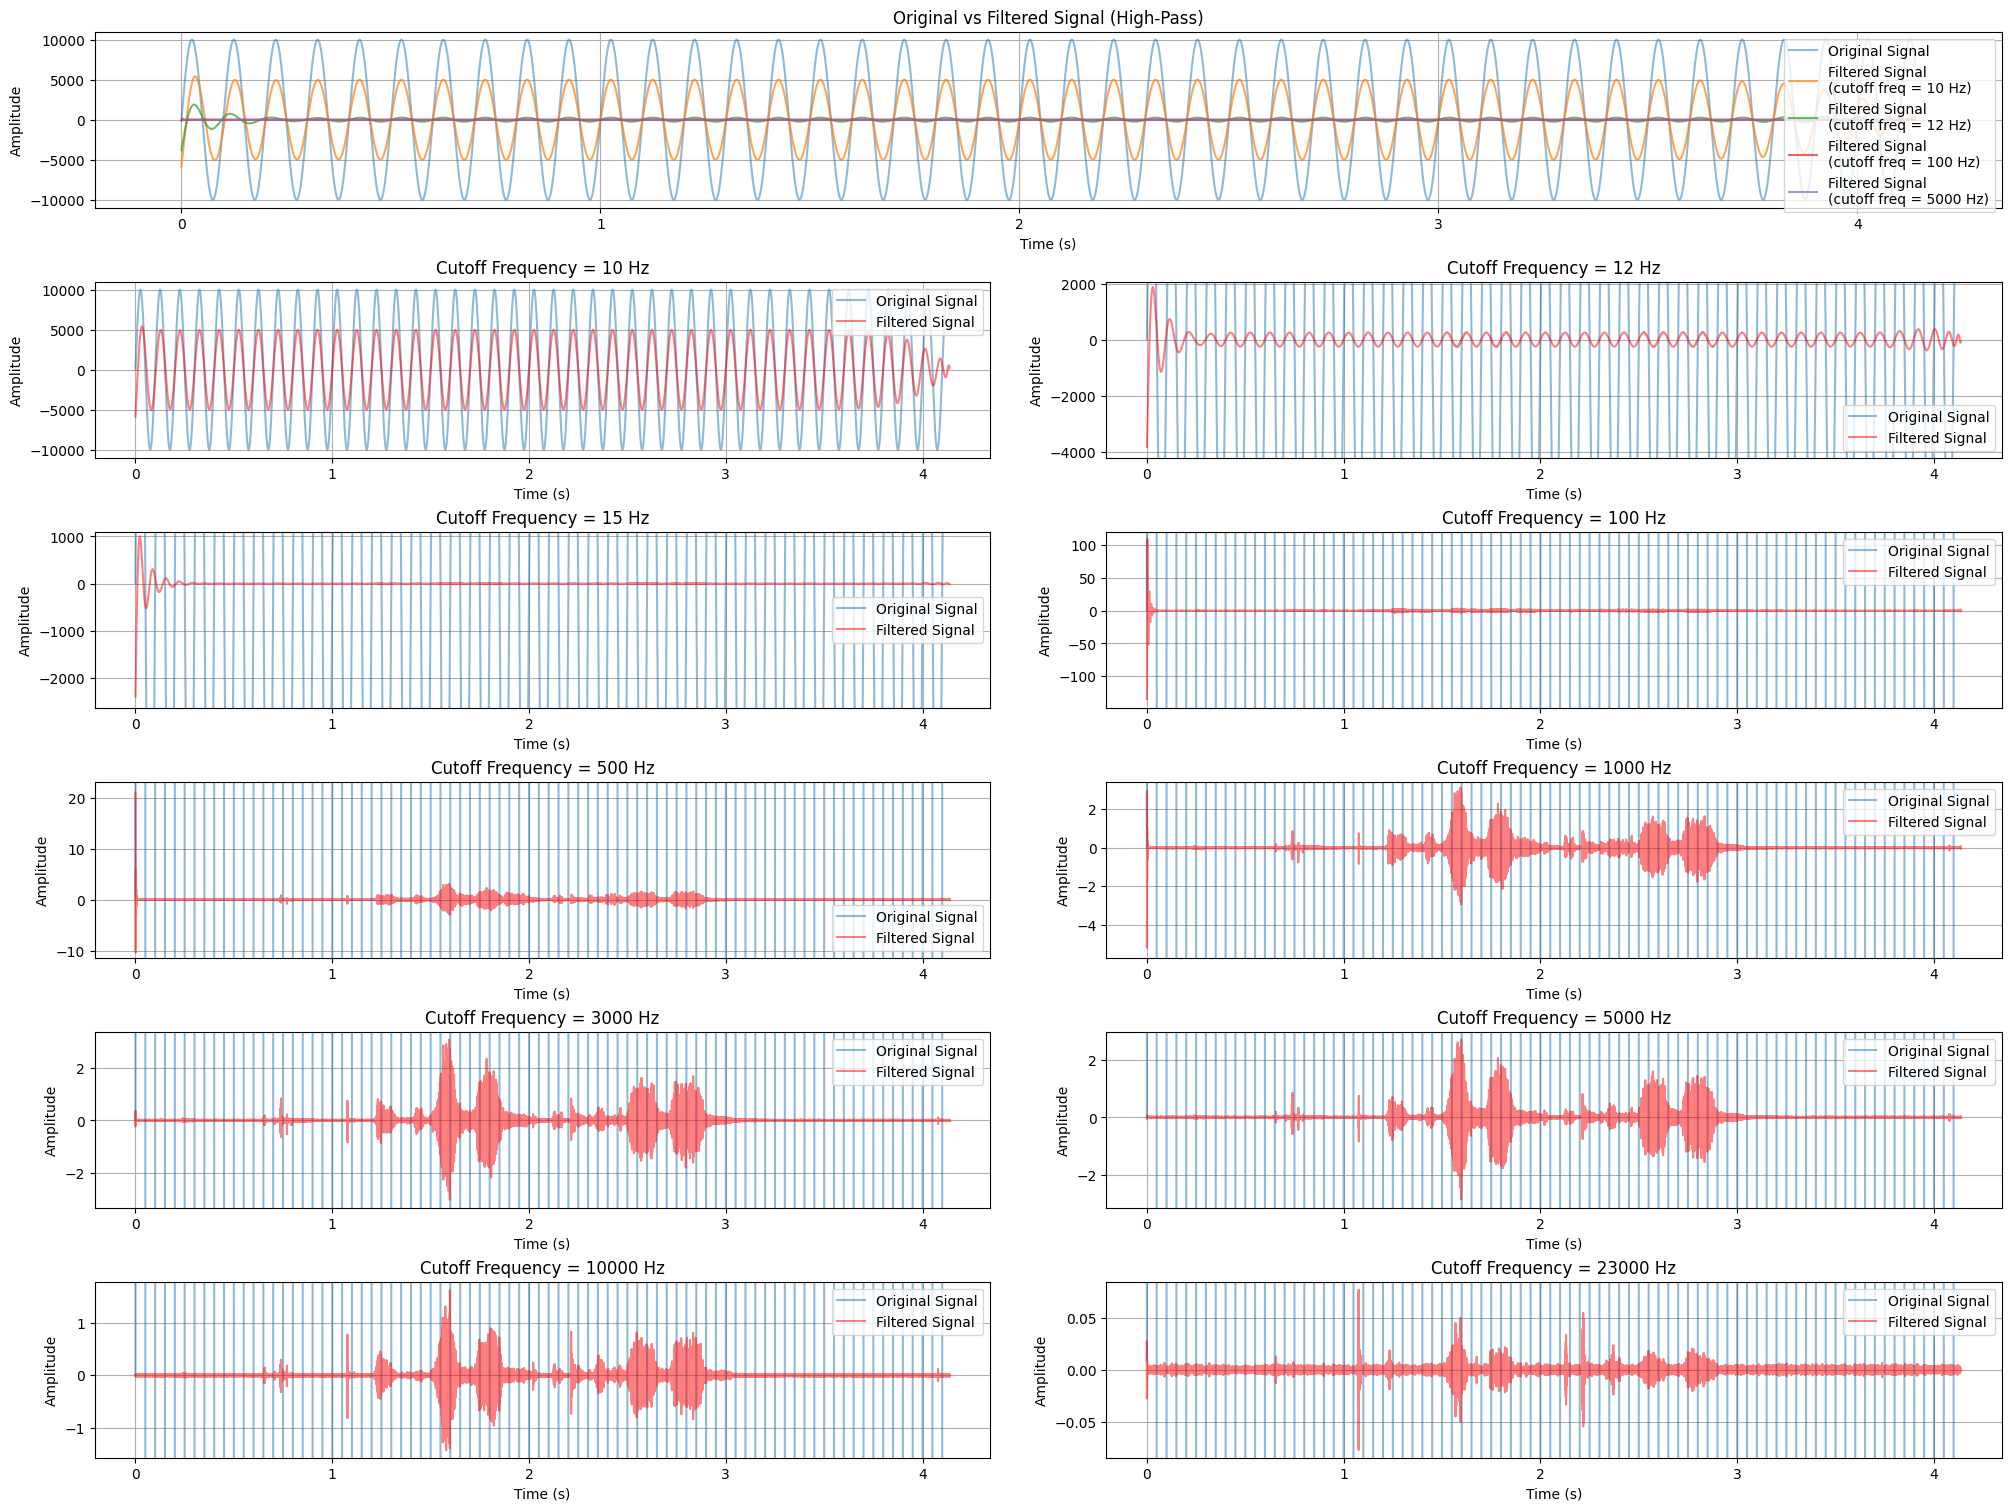

In [21]:
# Définir les fréquences de coupure
f_hights = [10, 12, 15, 100, 500, 1000, 3000, 5000, 10000, 23000]

fig, ax = plt.subplot_mosaic([[1, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11]], 
                              figsize=(20, 15), constrained_layout=True)

# Plotter le signal original
ax[1].plot(t, data, label='Original Signal', alpha=0.5)

# Itterer sur les fréquences de coupure
for i, f_hight in enumerate(f_hights):
    
    # Definir le filtre
    sos = butter(10, f_hight, btype='high', fs=samplerate, output='sos')
    
    # Appliquer le filtre
    filtered_signal = sosfiltfilt(sos, data).astype(np.float32)
    
    # Sauvegarder le signal filtré
    output_file = f'audio/IN_high_pass_{f_hight}.wav'
    wavfile.write(output_file, samplerate, filtered_signal)
    
    # Plotter le signal filtré et original
    if i in [0, 1, 3, 7]:
        ax[1].plot(t, filtered_signal, alpha=0.7,
                     label=f'Filtered Signal \n(cutoff freq = {f_hight} Hz)')
    ax[i+2].plot(t, data, label='Original Signal', alpha=0.5)
    ax[i+2].plot(t, filtered_signal, color='r', alpha=0.5,
                 label=f'Filtered Signal')
    ax[i+2].set_xlabel('Time (s)')
    ax[i+2].set_ylabel('Amplitude')
    if i != 0:
        ax[i+2].set_ylim(min(filtered_signal)*1.1, max(filtered_signal)*1.1)
    ax[i+2].set_title(f'Cutoff Frequency = {f_hight} Hz')
    ax[i+2].legend()
    ax[i+2].grid(True)

ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Original vs Filtered Signal (High-Pass)')
ax[1].legend()
ax[1].grid(True)
plt.show()

In [22]:
# Lancer le meilleur audio filtré
audio_file = glob('audio/IN_high_pass_*.wav')
ipd.Audio(audio_file[8])

On peut entendre clairement un message caché dans le signal audio filtré avec le filtre high-pass qui dit "2586". On constant donc que ce message a été caché dans les frequences hautes et que après avoir filtré les frequences basses, on peut l'entendre. On va tout de même tenter de filtrer le signal audio avec un filtre band-pass pour voir si cela peut améliorer la qualité du message. Cependant, on ne s'attend pas à l'améliorer car le message se trouve dans les fréquences hautes donc si on les filtre , on risque d'atténuer le message.

3. **Filtre band-pass** : On va filtrer le signal audio avec un filtre band-pass, c'est-à-dire qu'on va laisser passer que les fréquences comprises entre deux fréquences de coupure en supprimant les fréquences plus basses et plus hautes.

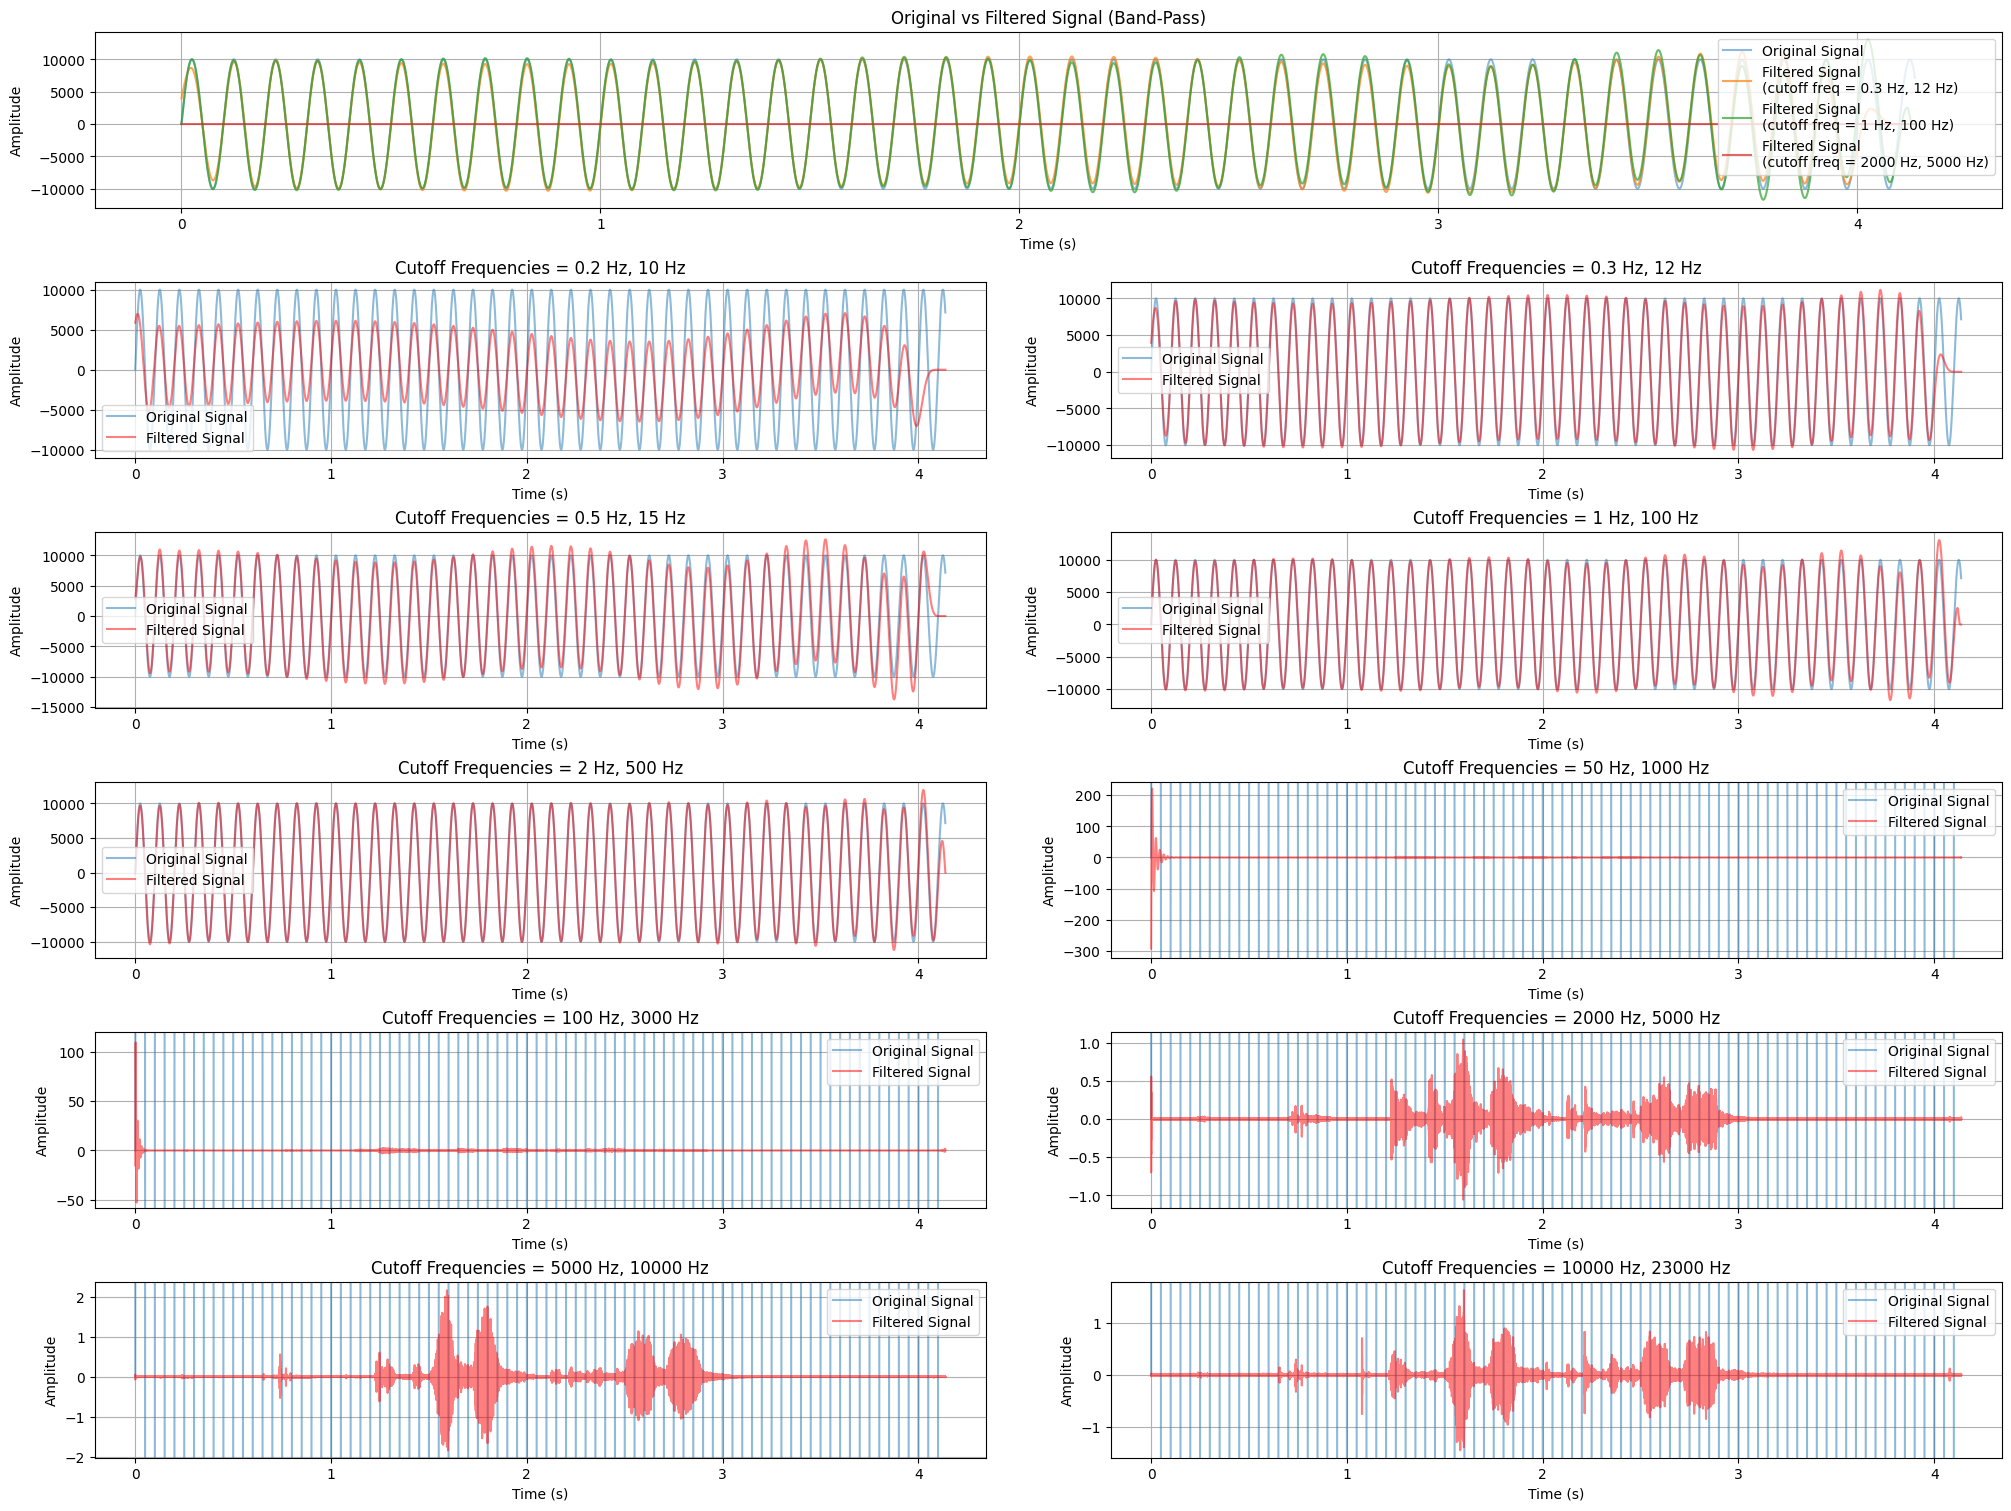

In [23]:
# Définir les fréquences de coupure
f_lows = [10000, 5000, 2000, 100, 50, 2, 1, 0.5, 0.3, 0.2]
f_hights = [10, 12, 15, 100, 500, 1000, 3000, 5000, 10000, 23000]

fig, ax = plt.subplot_mosaic([[1, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11]], 
                              figsize=(20, 15), constrained_layout=True)

# Plotter le signal original
ax[1].plot(t, data, label='Original Signal', alpha=0.5)

# Itterer sur les fréquences de coupure
for i, (f_low, f_high) in enumerate(zip(f_lows[::-1], f_hights)):
    
    # Definir le filtre
    sos = butter(10, [f_low, f_high], btype='band', fs=samplerate, output='sos')
    
    # Appliquer le filtre
    filtered_signal = sosfiltfilt(sos, data).astype(np.float32)
    
    # Sauvegarder le signal filtré
    output_file = f'audio/IN_band_pass_{f_low}-{f_high}.wav'
    wavfile.write(output_file, samplerate, filtered_signal)
    
    # Plotter le signal filtré et original
    if i in [1, 3, 7]:
        ax[1].plot(t, filtered_signal, alpha=0.7,
                     label=f'Filtered Signal \n(cutoff freq = {f_low} Hz, {f_high} Hz)')
    ax[i+2].plot(t, data, label='Original Signal', alpha=0.5)
    ax[i+2].plot(t, filtered_signal, color='r', alpha=0.5,
                 label=f'Filtered Signal')
    ax[i+2].set_xlabel('Time (s)')
    ax[i+2].set_ylabel('Amplitude')
    if i != 0:
        ax[i+2].set_ylim(min(filtered_signal)*1.1, max(filtered_signal)*1.1)
    ax[i+2].set_title(f'Cutoff Frequencies = {f_low} Hz, {f_high} Hz')
    ax[i+2].legend()
    ax[i+2].grid(True)

ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Original vs Filtered Signal (Band-Pass)')
ax[1].legend()
ax[1].grid(True)
plt.show()

In [24]:
# Lancer le meilleur audio filtré
audio_file = glob('audio/IN_band_pass_*.wav')
ipd.Audio(audio_file[7])

En effet, on observe que le message est atténué après le filtrage avec le filtre band-pass. On peut toujour l'entendre mais on conclut que le filtre high-pass est le meilleur filtre pour entendre le message caché.